In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_balita = "data_balita.csv"
data = pd.read_csv(data_balita)

In [3]:
data.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [5]:
#melihat apakah ada missing value
data.isnull().sum()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

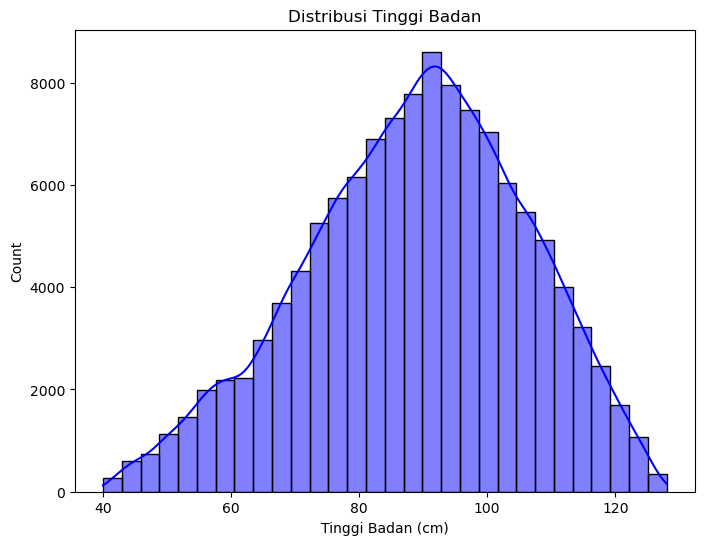

In [6]:
#Distribusi Tinggi Badan
plt.figure(figsize=(8, 6))
sns.histplot(data['Tinggi Badan (cm)'], kde=True, bins=30, color='blue')
plt.title('Distribusi Tinggi Badan')
plt.show()

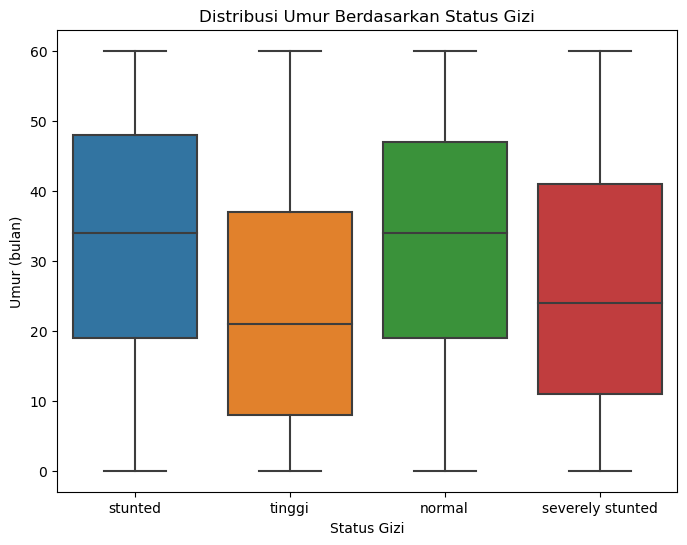

In [7]:
#Distribusi Umur berdasarkan Status Gizi
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status Gizi', y='Umur (bulan)', data=data)
plt.title('Distribusi Umur Berdasarkan Status Gizi')
plt.show()

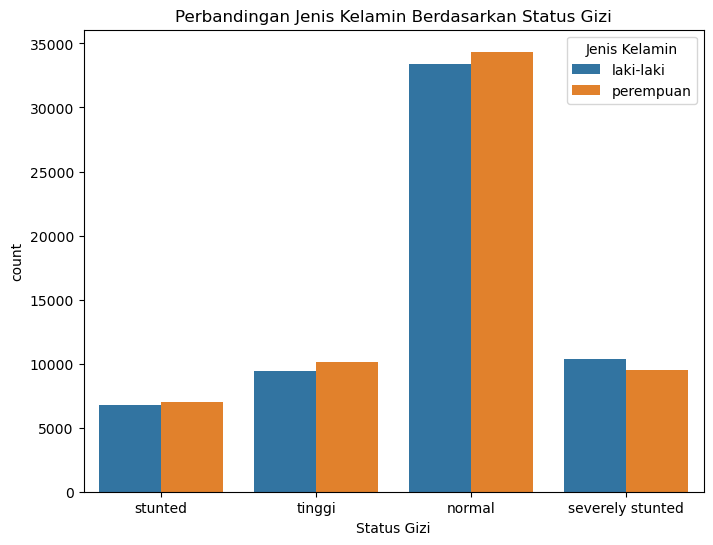

In [8]:
# Perbandingan Jenis Kelamin dalam Setiap Status Gizi
plt.figure(figsize=(8, 6))
sns.countplot(x='Status Gizi', hue='Jenis Kelamin', data=data)
plt.title('Perbandingan Jenis Kelamin Berdasarkan Status Gizi')
plt.show()

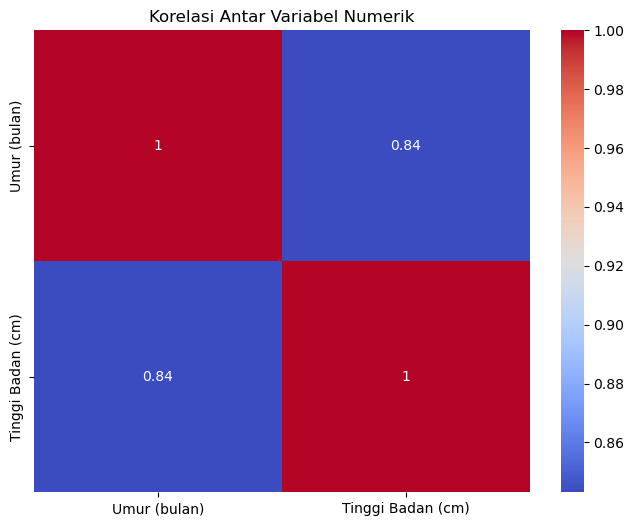

In [9]:
#  Korelasi antar variabel numerik
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Umur (bulan)', 'Tinggi Badan (cm)']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

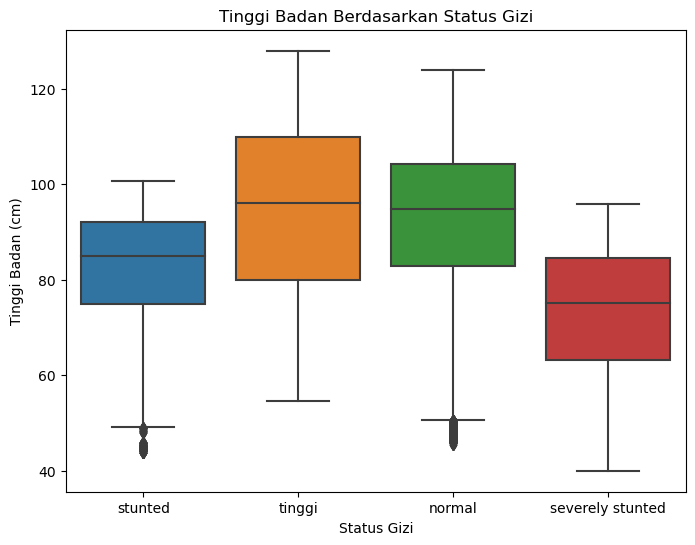

In [10]:
# Boxplot Tinggi Badan untuk Setiap Status Gizi
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status Gizi', y='Tinggi Badan (cm)', data=data)
plt.title('Tinggi Badan Berdasarkan Status Gizi')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [12]:
data['Status Gizi'] = data['Status Gizi'].astype('category').cat.codes

In [13]:
X = data[['Umur (bulan)', 'Tinggi Badan (cm)']]
y = data['Status Gizi']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9361570247933885
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     13382
           1       0.92      0.92      0.92      4130
           2       0.78      0.78      0.78      2790
           3       0.96      0.96      0.96      3898

    accuracy                           0.94     24200
   macro avg       0.91      0.91      0.91     24200
weighted avg       0.94      0.94      0.94     24200



In [17]:
import pickle

with open('knn_model_balita.sav', 'wb') as model_file:
    pickle.dump(knn, model_file)
    
print("Model telah disimpan dalam file knn_model_balita.sav")

Model telah disimpan dalam file knn_model_balita.sav
